In [1]:
#installing wordcloud library for later usage
#conda install -c conda-forge wordcloud

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [3]:
treatsdf = pd.read_csv('../data/treatscleaned_excel.csv')

In [4]:
#counting number of ingredients listed for each treat

ing_count = []

for x in treatsdf['ingredients']:
    try:    
        ing_count.append(x.count("|") + 1)
    except:
        ing_count.append(0)

In [5]:
len(ing_count)

137

In [6]:
treatsdf['ing_count'] = ing_count

In [7]:
treatsdf.head()

,urls,product,price,size,rating,ingredients,reviews,ing_count
0,https://www.petsmart.com/dog/treats/biscuits-a...,KONG® Ziggies™ Dog Treat,2.49,1.0,4.2,Pea Starch | Vegetable Glycerin | Sweet Potato...,25,18
1,https://www.petsmart.com/dog/treats/biscuits-a...,KONG® Snacks™ Peanut Butter Dog Treat,11.99,11.0,3.9,Whole Wheat Flour | Oat Flour | Peanuts | Cano...,35,14
2,https://www.petsmart.com/dog/treats/biscuits-a...,Hill's® Science Diet® Dog Treat,7.49,8.0,5.0,Chicken | Peas | Potatoes | Potato Starch | Ch...,12,12
3,https://www.petsmart.com/dog/treats/biscuits-a...,Blue Buffalo® All Life Stages Treat Dog Treats...,4.99,16.0,4.6,Oatmeal | Ground Barley | Ground Whole Oats |...,802,15
4,https://www.petsmart.com/dog/treats/biscuits-a...,Milk-Bone Flavor Snacks Dog Treat All Ages - B...,11.49,36.0,4.8,Ground Whole Wheat | Wheat Flour | Meat And Bo...,205,32


In [8]:
#removing anything in parantheses and newline breaks.

ingclean = []

for x in treatsdf['ingredients']:
    x = x.replace('\n', ' ')
    ingclean.append(re.sub("\(.*?\)", "", x))

In [9]:
ingclean

['Pea Starch | Vegetable Glycerin | Sweet Potato | Dried Chicken Liver | Gelatin | Powdered Cellulose | Molasses | Alfalfa | Dicalcium Phosphate | Lecithin | Poultry Fat | Titanium Dioxide | Sorbic Acid | Cod Liver Oil | Vanilla | Iron Oxide | Mixed Tocopherols  Caramel | Chlorophyll',
 'Whole Wheat Flour | Oat Flour | Peanuts | Canola Oil | Cane Molasses | Carob Powder | Vanilla | Maltodextrin | Peanut Flour | Dried Whole Eggs | Salt | Dried Skimmed Milk | Turmeric | Mixed Tocopherols',
 'Chicken | Peas | Potatoes | Potato Starch | Chicken Meal | Apples | Dried Beet Pulp | Cane Molasses | Chicken Fat | Chicken Liver Flavor | Caramel Color | Mixed Tocopherols for Freshness and Natural Flavors',
 ' Oatmeal | Ground Barley | Ground Whole Oats | Rye | Chicken Meal | Bacon | Dried Egg | Cheese | Flaxseed  | Carrots | Oat Fiber | Vitamin C | Vitamin E Supplement | Salt | Calcium Carbonate',
 'Ground Whole Wheat | Wheat Flour | Meat And Bone Meal  | Beef Fat  | Poultry By-product Meal | Chic

In [10]:
treatsdf['ing_cleaned'] = ingclean

In [11]:
treatsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   urls         137 non-null    object 
 1   product      137 non-null    object 
 2   price        137 non-null    float64
 3   size         137 non-null    float64
 4   rating       137 non-null    float64
 5   ingredients  137 non-null    object 
 6   reviews      137 non-null    int64  
 7   ing_count    137 non-null    int64  
 8   ing_cleaned  137 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 9.8+ KB


In [12]:
#splitting ingredients column to a list.

inglist = []
for x in treatsdf['ing_cleaned']:
    inglist.append(x.split(" | "))

In [13]:
inglist

[['Pea Starch',
  'Vegetable Glycerin',
  'Sweet Potato',
  'Dried Chicken Liver',
  'Gelatin',
  'Powdered Cellulose',
  'Molasses',
  'Alfalfa',
  'Dicalcium Phosphate',
  'Lecithin',
  'Poultry Fat',
  'Titanium Dioxide',
  'Sorbic Acid',
  'Cod Liver Oil',
  'Vanilla',
  'Iron Oxide',
  'Mixed Tocopherols  Caramel',
  'Chlorophyll'],
 ['Whole Wheat Flour',
  'Oat Flour',
  'Peanuts',
  'Canola Oil',
  'Cane Molasses',
  'Carob Powder',
  'Vanilla',
  'Maltodextrin',
  'Peanut Flour',
  'Dried Whole Eggs',
  'Salt',
  'Dried Skimmed Milk',
  'Turmeric',
  'Mixed Tocopherols'],
 ['Chicken',
  'Peas',
  'Potatoes',
  'Potato Starch',
  'Chicken Meal',
  'Apples',
  'Dried Beet Pulp',
  'Cane Molasses',
  'Chicken Fat',
  'Chicken Liver Flavor',
  'Caramel Color',
  'Mixed Tocopherols for Freshness and Natural Flavors'],
 [' Oatmeal',
  'Ground Barley',
  'Ground Whole Oats',
  'Rye',
  'Chicken Meal',
  'Bacon',
  'Dried Egg',
  'Cheese',
  'Flaxseed ',
  'Carrots',
  'Oat Fiber',
  '

In [14]:
#removing leading and trailing spaces
#flattening list of lists to use with WordCloud

inglist_flat = []

for sublist in inglist:
    for item in sublist:
        item = item.strip()
        inglist_flat.append(item)

In [15]:
inglist_flat

['Pea Starch',
 'Vegetable Glycerin',
 'Sweet Potato',
 'Dried Chicken Liver',
 'Gelatin',
 'Powdered Cellulose',
 'Molasses',
 'Alfalfa',
 'Dicalcium Phosphate',
 'Lecithin',
 'Poultry Fat',
 'Titanium Dioxide',
 'Sorbic Acid',
 'Cod Liver Oil',
 'Vanilla',
 'Iron Oxide',
 'Mixed Tocopherols  Caramel',
 'Chlorophyll',
 'Whole Wheat Flour',
 'Oat Flour',
 'Peanuts',
 'Canola Oil',
 'Cane Molasses',
 'Carob Powder',
 'Vanilla',
 'Maltodextrin',
 'Peanut Flour',
 'Dried Whole Eggs',
 'Salt',
 'Dried Skimmed Milk',
 'Turmeric',
 'Mixed Tocopherols',
 'Chicken',
 'Peas',
 'Potatoes',
 'Potato Starch',
 'Chicken Meal',
 'Apples',
 'Dried Beet Pulp',
 'Cane Molasses',
 'Chicken Fat',
 'Chicken Liver Flavor',
 'Caramel Color',
 'Mixed Tocopherols for Freshness and Natural Flavors',
 'Oatmeal',
 'Ground Barley',
 'Ground Whole Oats',
 'Rye',
 'Chicken Meal',
 'Bacon',
 'Dried Egg',
 'Cheese',
 'Flaxseed',
 'Carrots',
 'Oat Fiber',
 'Vitamin C',
 'Vitamin E Supplement',
 'Salt',
 'Calcium Carbo

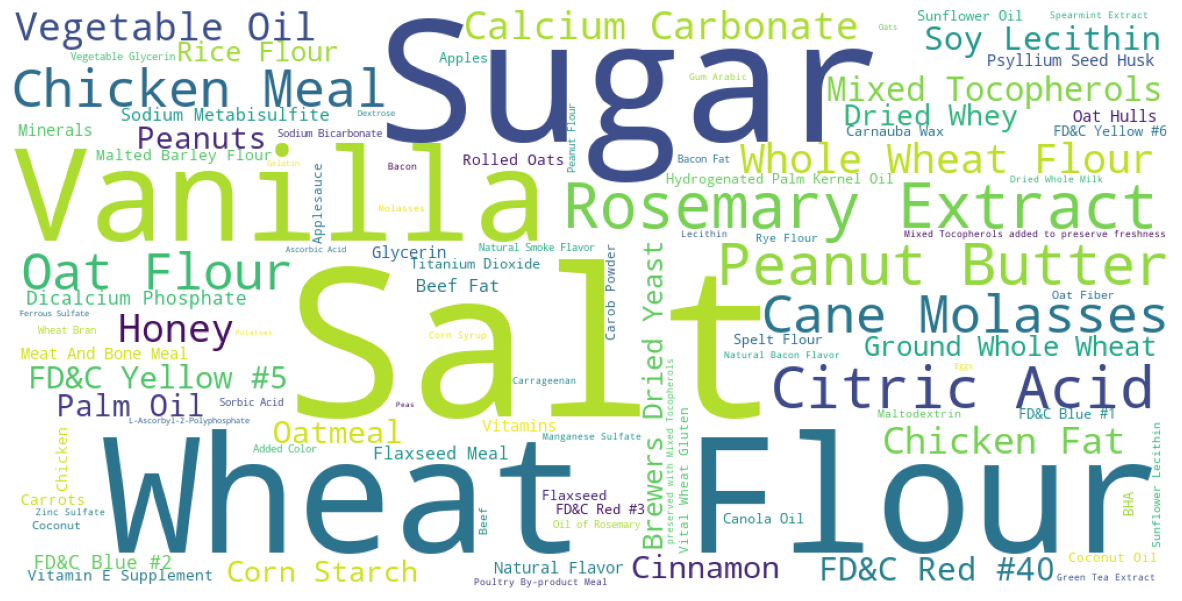

In [37]:
#Counter library assists with generating frequency for the given list.
from collections import Counter

#plotting wordcloud based on frequency from the dictionary created.
word_cloud_dict=Counter(inglist_flat)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white', max_words=100).generate_from_frequencies(word_cloud_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('ingredientswordcloud.png', bbox_inches='tight')
plt.close()

In [41]:
#creating dataframe from dictionary
ingredientscount = pd.DataFrame.from_dict(word_cloud_dict, orient='index').reset_index()

In [43]:
ingredientscount.columns = ['ingredient', 'count']

In [49]:
ingredientscount = ingredientscount.sort_values('count', ascending=False).reset_index(drop=True)

In [50]:
ingredientscount.to_csv('../data/ingredientscount.csv')

In [51]:
treatsdf == [['urls', 'product', 'size', 'rating', 'reviews']]

,urls,product,price,size,rating,ingredients,reviews,ing_count,ing_cleaned
0,https://www.petsmart.com/dog/treats/biscuits-a...,KONG® Ziggies™ Dog Treat,2.49,1.0,4.2,Pea Starch | Vegetable Glycerin | Sweet Potato...,25,18,Pea Starch | Vegetable Glycerin | Sweet Potato...
1,https://www.petsmart.com/dog/treats/biscuits-a...,KONG® Snacks™ Peanut Butter Dog Treat,11.99,11.0,3.9,Whole Wheat Flour | Oat Flour | Peanuts | Cano...,35,14,Whole Wheat Flour | Oat Flour | Peanuts | Cano...
2,https://www.petsmart.com/dog/treats/biscuits-a...,Hill's® Science Diet® Dog Treat,7.49,8.0,5.0,Chicken | Peas | Potatoes | Potato Starch | Ch...,12,12,Chicken | Peas | Potatoes | Potato Starch | Ch...
3,https://www.petsmart.com/dog/treats/biscuits-a...,Blue Buffalo® All Life Stages Treat Dog Treats...,4.99,16.0,4.6,Oatmeal | Ground Barley | Ground Whole Oats |...,802,15,Oatmeal | Ground Barley | Ground Whole Oats |...
4,https://www.petsmart.com/dog/treats/biscuits-a...,Milk-Bone Flavor Snacks Dog Treat All Ages - B...,11.49,36.0,4.8,Ground Whole Wheat | Wheat Flour | Meat And Bo...,205,32,Ground Whole Wheat | Wheat Flour | Meat And Bo...
...,...,...,...,...,...,...,...,...,...
132,https://www.petsmart.com/dog/treats/biscuits-a...,Bocce's Bakery Blueberries Are Blue Dog Treats,7.50,1.0,5.0,Oat Flour | Peanut Butter | and Blueberries,2,3,Oat Flour | Peanut Butter | and Blueberries
133,https://www.petsmart.com/dog/treats/biscuits-a...,Greenies Smartbites Immune Support Crunchy & S...,18.99,28.0,4.8,Chicken Meal | Brewers Rice | Ground Whole Whe...,123,37,Chicken Meal | Brewers Rice | Ground Whole Whe...
134,https://www.petsmart.com/dog/treats/biscuits-a...,Spunky Pup Dog Pup Tarts Semi Moist Dog Treats...,2.50,5.0,3.0,Oat Flour | Rice Flour | Vegetable Glycerin | ...,2,9,Oat Flour | Rice Flour | Vegetable Glycerin | ...
135,https://www.petsmart.com/dog/treats/biscuits-a...,Himalayan Dog Chew Bacon Bites Cookies Crunchy...,14.48,14.0,0.0,Brown Rice Flour | Oat Flour | Coconut Flour |...,0,9,Brown Rice Flour | Oat Flour | Coconut Flour |...
